In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

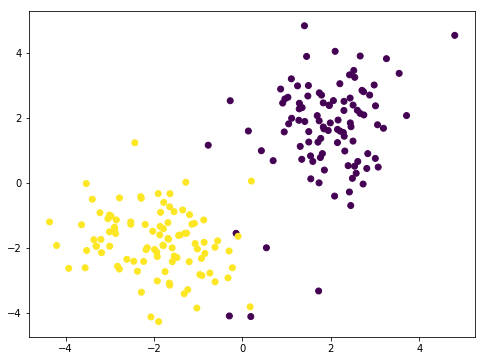

In [2]:
D = 2
K = 2
N = K*100

X0 = np.random.randn(N//K, D) + np.array([2,2])
X0[-5:,:] -= np.array([2,4])
X1 = np.random.randn(N//K, D) + np.array([-2,-2])
X = np.vstack((X0,X1))

y = np.array([0]*(N//K) + [1]*(N//K))

plt.figure(figsize = (8,6))
plt.scatter(X[:,0], X[:,1], c = y)

In [3]:
def sigmoid(h):
    return 1 / (1 + np.exp(-h))

def cross_entropy(y,p):
    return -np.sum(y*np.log(p) + (1 - y)*np.log(1 - p))

def accuracy(y,p):
    return np.mean(y == np.round(p))

def Recall(y,p):
    return p.T.dot(y) / sum(y)

def Precison(y,p):
    return p.T.dot(y) / sum(p)

def F_score (y,p):
    return (2 * Recall(y,p) * Precison(y,p))/ (Recall(y,p) + Precison(y,p))

In [4]:
X = np.column_stack((np.ones((N,1)), X))

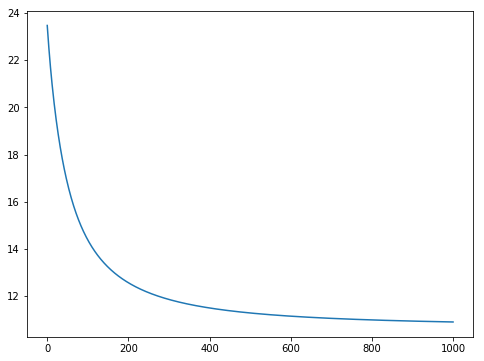

In [5]:
w = np.random.randn(D + 1)

J = []
eta = 1e-3
epochs = int(1e3)

for t in range(epochs):
    p = sigmoid(X.dot(w))
    J.append(cross_entropy(y,p))
    w -= eta*(X.T.dot(p - y))
    
plt.figure(figsize = (8,6))
plt.plot(J)

In [6]:
accuracy(y,p)

0.975

(-5, 5)

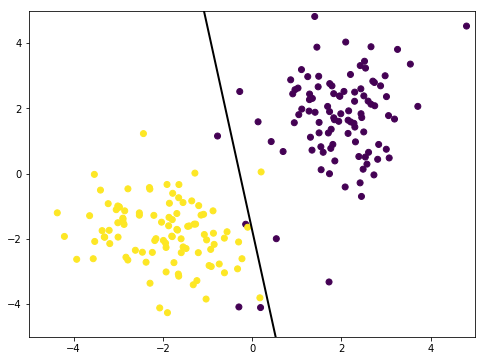

In [7]:
x1 = np.linspace(-5, 5, 100)
x2 = -(w[0]/w[2]) - (w[1]/w[2])*x1

plt.figure(figsize = (8,6))
plt.scatter(X[:,1], X[:,2], c = y)
plt.plot(x1, x2, color = "black", linewidth = 2)
plt.ylim(-5,5)
plt.xlim(-5,5)

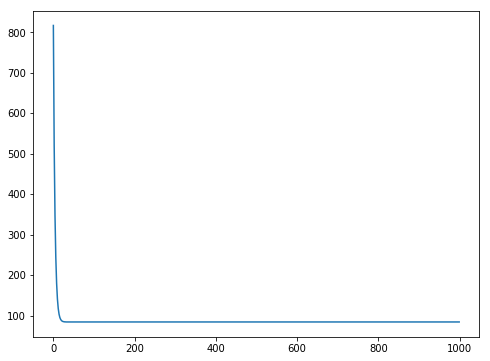

In [8]:
w_l2 = np.random.randn(D + 1)
l2 = 100

J = []
eta = 1e-3
epochs = int(1e3)

for t in range(epochs):
    p_l2 = sigmoid(X.dot(w_l2))
    J.append(cross_entropy(y,p_l2) + l2*w_l2.dot(w_l2))
    w_l2 -= eta*(X.T.dot(p_l2 - y) + l2*w_l2)
    
plt.figure(figsize = (8,6))
plt.plot(J)

In [10]:
l2*w_l2.dot(w_l2)

43.16420629683987

In [9]:
accuracy(y,p_l2)

0.975

(-5, 5)

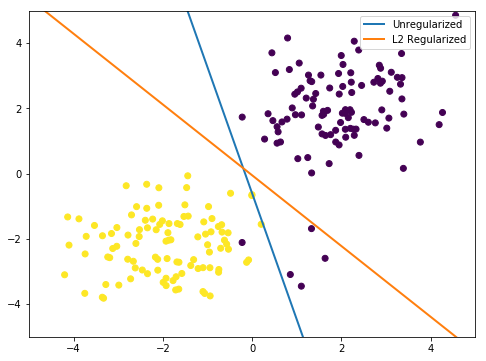

In [10]:
x1_l2 = x1
x2_l2 = -(w_l2[0]/w_l2[2]) - (w_l2[1]/w_l2[2])*x1_l2

plt.figure(figsize = (8,6))
plt.scatter(X[:,1], X[:,2], c = y)
plt.plot(x1, x2, label = "Unregularized", linewidth = 2)
plt.plot(x1_l2, x2_l2, label = "L2 Regularized", linewidth = 2)
plt.legend()
plt.xlim(-5, 5)
plt.ylim(-5, 5)

In [11]:
print("F Score of no l2: {}".format(F_score(y,p)))
print("F Score of l2: {}".format(F_score(y,p_l2)))  


F Score of no l2: 0.9783301046473365
F Score of l2: 0.8374415878304904
